In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from collections import Counter

import matplotlib.pyplot as plt


In [2]:
# nltk.download('stopwords')
# nltk.download('punkt_tab')  
# nltk.download('punkt')  


In [3]:
text_df = pd.read_csv(r'Dataset_projet_pretraitement_textes_images\Flipkart\flipkart_com-ecommerce_sample_1050.csv')
text_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


## Exploration du texte

In [4]:
#Regex pour ne garder que les caractères alphanumérique
text_df['description_nettoyee'] = text_df['description'].str.replace(r'[^A-Za-z0-9]', ' ', regex=True).str.lower()
text_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description_nettoyee
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications of sathiyas cotton bath towel ...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features of eurospa cotton terry face towe...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features of jaipur print cotton floral kin...


In [5]:
text_df['tokens'] = text_df['description_nettoyee'].apply(word_tokenize)
text_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description_nettoyee,tokens
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of elegance polyester multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications of sathiyas cotton bath towel ...,"[specifications, of, sathiyas, cotton, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features of eurospa cotton terry face towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of santosh royal fashion cotton p...,"[key, features, of, santosh, royal, fashion, c..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features of jaipur print cotton floral kin...,"[key, features, of, jaipur, print, cotton, flo..."


In [6]:
text_df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
description_nettoyee        object
tokens                      object
dtype: object

### Analyse et normalisation des données

In [7]:
#Nombre total de mot par description
text_df['total_words'] = text_df['tokens'].apply(len)

#Nombre de mots uniques par description
text_df['unique_words'] = text_df['tokens'].apply(lambda x: len(set(x)))

text_df.describe()

,retail_price,discounted_price,total_words,unique_words
count,1049.000000,1049.000000,1050.000000,1050.000000
mean,2186.197331,1584.527169,77.820952,45.548571
std,7639.229411,7475.099680,76.525480,32.840459
min,35.000000,35.000000,14.000000,10.000000
25%,555.000000,340.000000,31.000000,26.000000
50%,999.000000,600.000000,44.000000,32.000000
75%,1999.000000,1199.000000,97.000000,52.000000
max,201000.000000,201000.000000,587.000000,262.000000


In [8]:
#Nombre de mots uniques par description
text_df['unique_words'] = text_df['tokens'].apply(lambda x: len(set(x)))

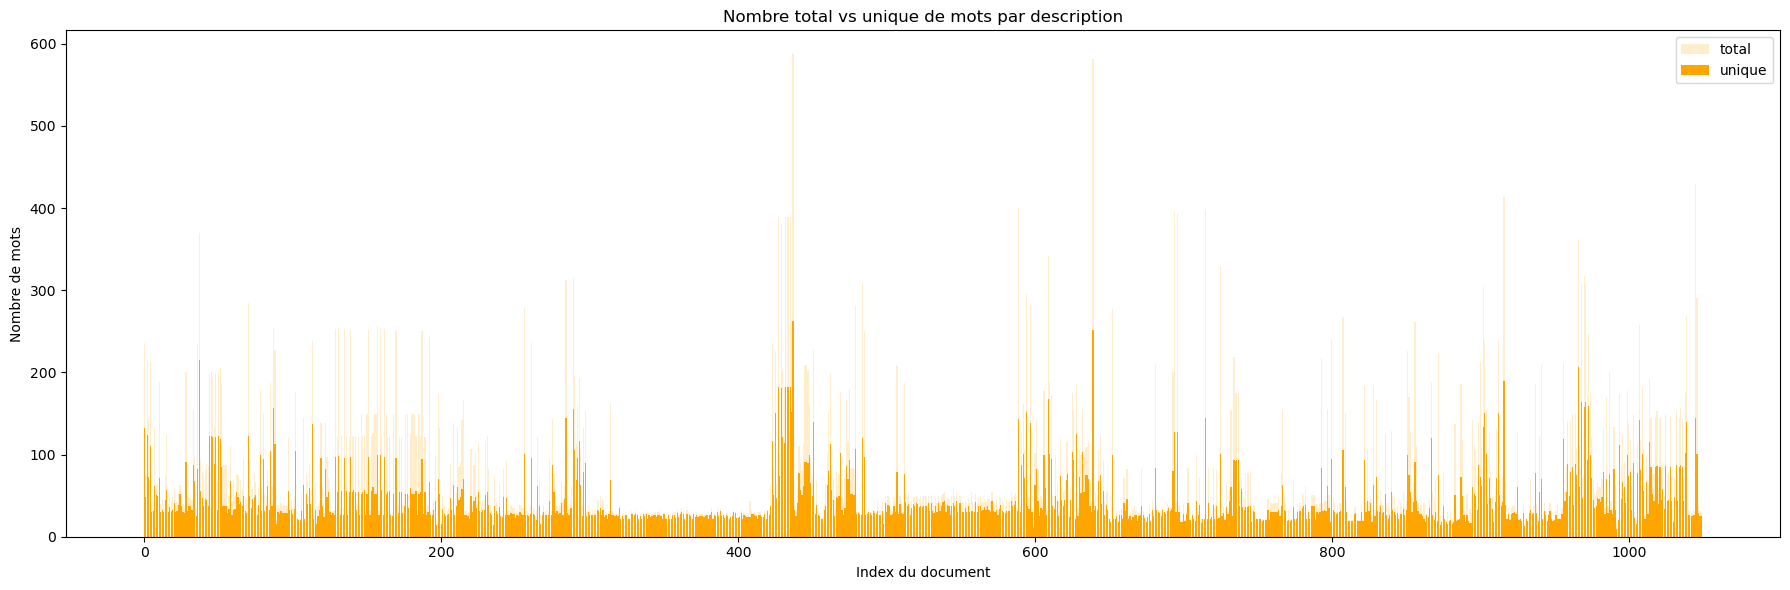

In [9]:
plt.figure(figsize=(18,6))

x = range(len(text_df))

plt.bar(x, text_df['total_words'], color='orange', alpha=0.2, label='total')
plt.bar(x, text_df['unique_words'], color='orange', alpha=1, label='unique')

plt.xlabel('Index du document')
plt.ylabel('Nombre de mots')
plt.title('Nombre total vs unique de mots par description')
plt.legend()
plt.tight_layout()
plt.show()

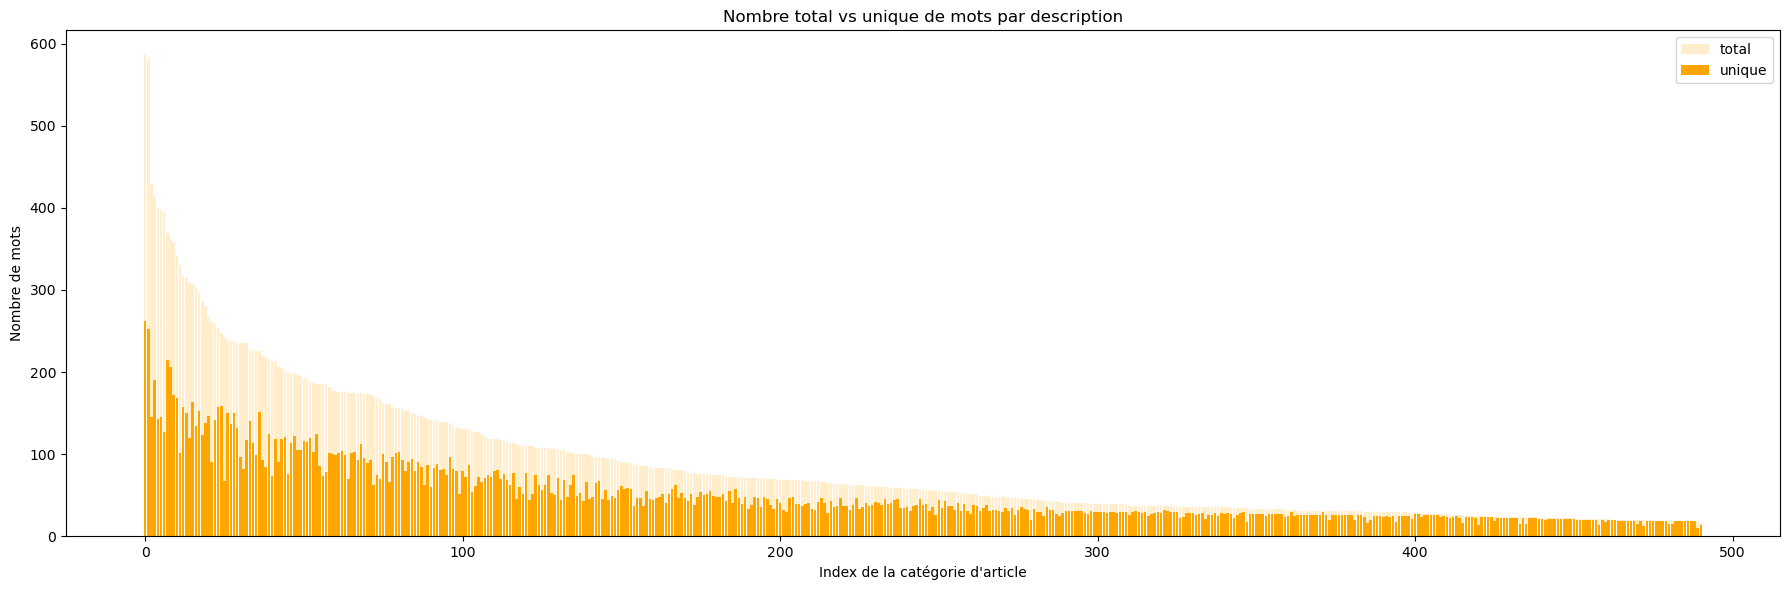

In [10]:
text_df['brand_str'] = text_df['brand'].astype(str)
text_df_cat = text_df.groupby('brand_str')[['total_words', 'unique_words']].mean().reset_index()
text_df_cat = text_df_cat.sort_values(by='total_words', ascending=False).reset_index(drop=True)

plt.figure(figsize=(18,6))

x = range(len(text_df_cat))

plt.bar(x, text_df_cat['total_words'], color='orange', alpha=0.2, label='total')
plt.bar(x, text_df_cat['unique_words'], color='orange', alpha=1, label='unique')

plt.xlabel("Index de la catégorie d'article")
plt.ylabel('Nombre de mots')
plt.title('Nombre total vs unique de mots par description')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
text_df_cat.head(10)

,brand_str,total_words,unique_words
0,HomeEdge,587.000000,262.000000
1,Sunlast,582.000000,252.000000
2,Oren Empower,429.000000,145.000000
3,wallskart,413.000000,190.000000
4,Shopfloor.XYZ,400.000000,143.000000
5,Pioneer Pragati,398.000000,145.000000
6,Tallenge,394.500000,127.500000
7,Dungri India Craft,370.000000,215.000000
8,Checkered Chef,362.000000,206.000000
9,Smartpro,358.142857,172.142857


In [12]:
all_words = [word for sublist in text_df['tokens'] for word in sublist]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('of', 1751), ('for', 1447), ('the', 1369), ('and', 1332), ('to', 1058), ('in', 1047), ('rs', 911), ('only', 890), ('with', 843), ('on', 835)]


Le soucis rencontré ici est que les mots les plus courants votn être ceux qui donnent le moins de signification comme "of", "for", "the", "and"... Nous allons devoir les enelver pour poursuivre l'analyse. 

In [15]:
stop_words = set(stopwords.words('english'))
text_df['tokens_wo'] = text_df['tokens'].apply(lambda tokens: [w for w in tokens if w.lower() not in stop_words])

all_words_sw = [word for sublist in text_df['tokens_wo'] for word in sublist]
word_counts_sw = Counter(all_words_sw)
most_common_words_sw = word_counts_sw.most_common(10)
print(most_common_words_sw)


[('rs', 911), ('products', 631), ('free', 618), ('buy', 581), ('delivery', 567), ('genuine', 564), ('shipping', 564), ('cash', 564), ('replacement', 559), ('1', 557)]


In [14]:
#Nombre total de mot par description
text_df['total_meaning_words'] = text_df['tokens_wo'].apply(len)

#Nombre de mots uniques par description
text_df['unique_words_wo'] = text_df['tokens_wo'].apply(lambda x: len(set(x)))

text_df.describe()

,retail_price,discounted_price,total_words,unique_words,total_meaning_words,unique_words_wo
count,1049.000000,1049.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2186.197331,1584.527169,77.820952,45.548571,58.948571,37.326667
std,7639.229411,7475.099680,76.525480,32.840459,52.500572,26.386743
min,35.000000,35.000000,14.000000,10.000000,13.000000,9.000000
25%,555.000000,340.000000,31.000000,26.000000,26.000000,22.000000
50%,999.000000,600.000000,44.000000,32.000000,37.000000,26.000000
75%,1999.000000,1199.000000,97.000000,52.000000,76.000000,42.000000
max,201000.000000,201000.000000,587.000000,262.000000,385.000000,217.000000


In [18]:
from nltk.stem import PorterStemmer
nltk.download("punkt")

# Initialize Python porter stemmer
ps = PorterStemmer()

# Perform stemming
print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in all_words_sw:
   print ("{0:20}{1:20}".format(word, ps.stem(word)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--Word--            --Stem--            
key                 key                 
features            featur              
elegance            eleg                
polyester           polyest             
multicolor          multicolor          
abstract            abstract            
eyelet              eyelet              
door                door                
curtain             curtain             
floral              floral              
curtain             curtain             
elegance            eleg                
polyester           polyest             
multicolor          multicolor          
abstract            abstract            
eyelet              eyelet              
door                door                
curtain             curtain             
213                 213                 
cm                  cm                  
height              height              
pack                pack                
2                   2                   
price           